In [4]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL, Task, URIRef

In [5]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [6]:
jasper.service().rdf_table().head()

,Subject,Predicate,Object
0,b7,http://w3id.org/rsp/vocals#feature,http://localhost:8181//QueryGetterFeature
1,b5,http://w3id.org/rsp/vocals-sd#name,QueryRegistrationFeature
2,http://localhost:8181/jasper,http://w3id.org/rsp/vocals-sd#hasService,b0
3,b8,http://w3id.org/rsp/vocals-sd#method,DELETE
4,b6,http://w3id.org/rsp/vocals-sd#uri_param,b15


In [7]:
jasper.streams()

[]

In [8]:
jasper.tasks()

[]

In [9]:
redstream = Stream("http://redstream:1255/red")

In [10]:
redstream.endpoints()[0].call().rdf_table()

,Subject,Predicate,Object
0,file:///home/jovyan/work/solutions/a4496d30-f1...,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.streamreasoning.org/ontologies/2018...


In [11]:
qid  = "redcount"
tbox = "https://raw.githubusercontent.com/riccardotommasini/colorwave/master/colors.owl"
frmt = "JSON"
body ="""
        SELECT (COUNT(?r) as ?numRed)
        FROM NAMED WINDOW <rw> ON <http://redstream:1255/red> [RANGE PT15S STEP PT5S]
        WHERE {
                WINDOW ?rw { ?r a <http://www.streamreasoning.org/ontologies/2018/9/colors#Red> .}
            }
      """

In [12]:
jasper.create(qid, body, tbox, frmt)

In [13]:
task = jasper.getq(qid)

In [14]:
task.sources()

[GET http://redstream:1255/red]

In [17]:
jasper.streams()[1]

In [18]:
r = jasper.expose(qid, 'HTTP', retention=5)

In [19]:
jasper.streams()

[http://redstream:1255/red, http://jasper:8181/jasper/streams/redcount]

In [20]:
jasper.streams()[1]

In [16]:
endpoint = r.endpoints()[0]

In [17]:
resp = endpoint.call()
resp

In [18]:
df = resp.flatten().dataframe(['results_bindings_0_numRed_value'])

In [19]:
df

,head_vars_0,results_bindings_0_numRed_datatype,results_bindings_0_numRed_type,results_bindings_0_numRed_value
0,numRed,http://www.w3.org/2001/XMLSchema#integer,literal,12
1,numRed,http://www.w3.org/2001/XMLSchema#integer,literal,14
2,numRed,http://www.w3.org/2001/XMLSchema#integer,literal,12
3,numRed,http://www.w3.org/2001/XMLSchema#integer,literal,13
4,numRed,http://www.w3.org/2001/XMLSchema#integer,literal,13


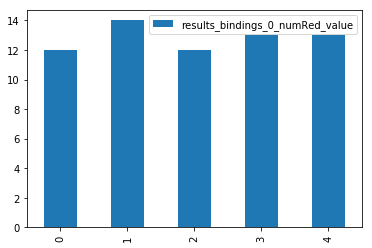

In [21]:
% matplotlib inline
df.plot(kind='bar')

In [22]:
jasper.delete(qid)